In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [503]:
df = pd.read_csv("./data/cruise_ship_info.csv")


In [504]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

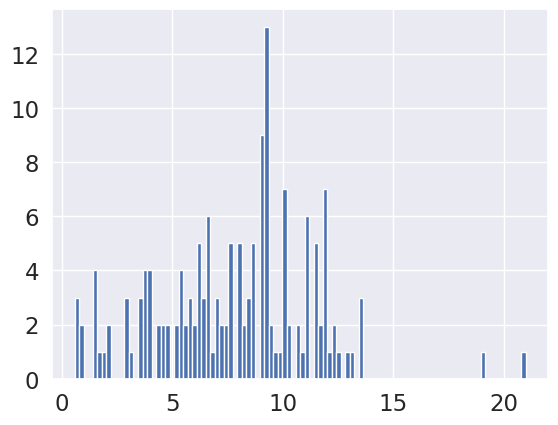

In [505]:
df["crew"].hist(bins=100)
plt.show()

In [506]:
vis_df = df.iloc[:, 1:]
vis_df.head()

,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

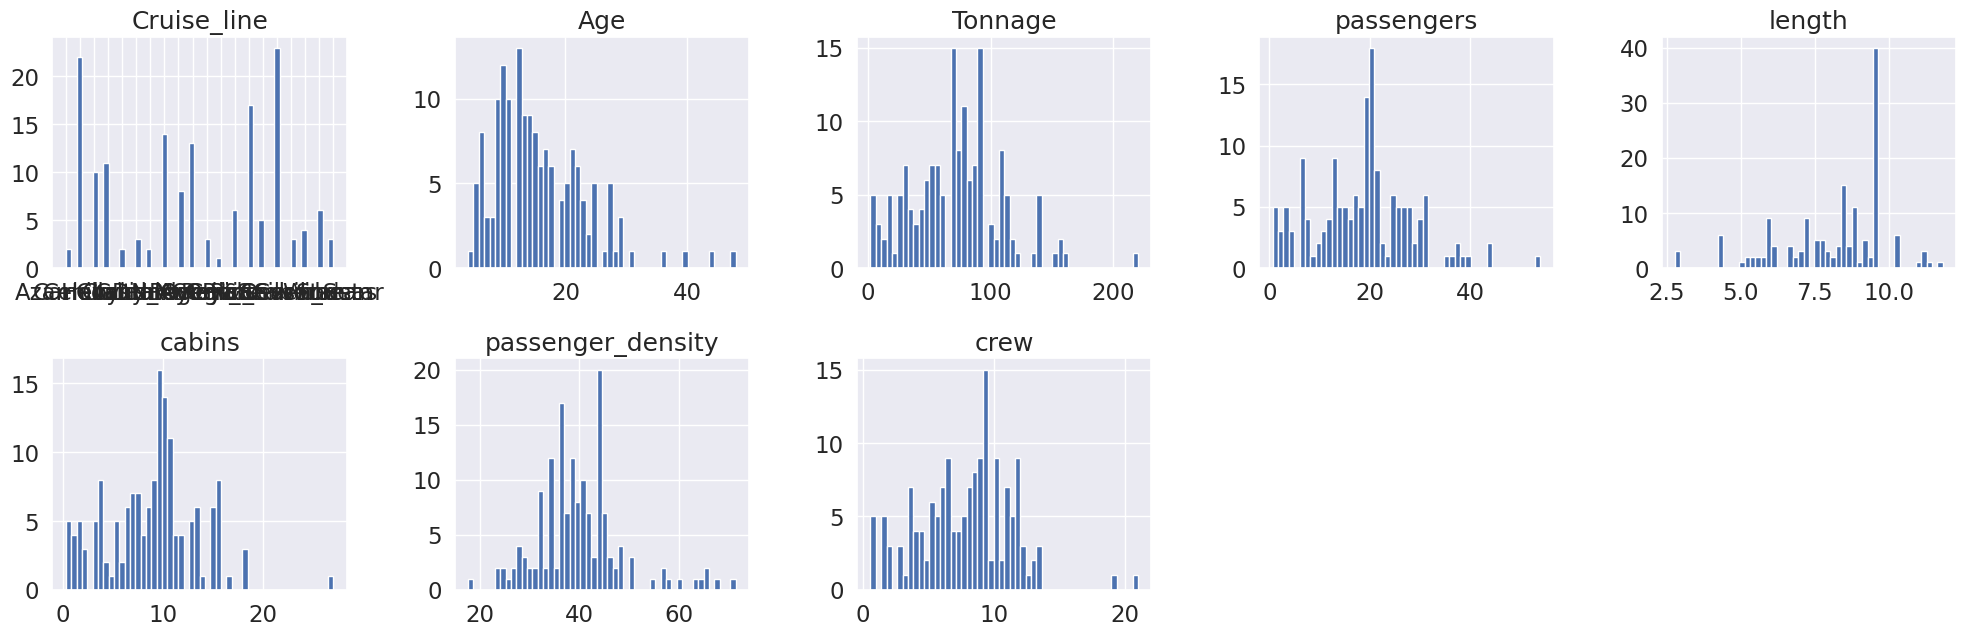

In [507]:
fig = plt.figure(figsize = (20, 16))

for i in range(len(vis_df.columns)):
    ax = fig.add_subplot(5, 5, i + 1)
    plt.hist(vis_df[vis_df.columns[i]], bins = 50)
    ax.set_title(vis_df.columns[i])
    
plt.tight_layout()
plt.show()

In [508]:
scale_col = df.columns[2:].tolist()


df.columns[2:].tolist()

['Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

In [509]:
scale_col

['Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

In [510]:
ss = StandardScaler()

In [511]:
scaled_df = ss.fit_transform(df[scale_col])

In [512]:
scaled_df

array([[-1.27640208, -1.10498441, -1.19395611, ..., -1.18458832,
         0.31805658, -1.21526718],
       [-1.27640208, -1.10498441, -1.19395611, ..., -1.18458832,
         0.31805658, -1.21526718],
       [ 1.35810515, -0.64731003, -0.37292634, ..., -0.31409539,
        -0.9406764 , -0.31330399],
       ...,
       [ 1.22637979, -1.77666231, -1.74960252, ..., -1.81502263,
        -0.70147068, -1.97978836],
       [ 1.48983051, -1.77666231, -1.74027264, ..., -1.81502263,
        -0.91280777, -1.97978836],
       [ 0.96292907, -1.52350654, -1.59410446, ..., -1.63105247,
         0.92536041, -1.71635785]])

In [513]:
scaled_df = pd.DataFrame(scaled_df, columns=scale_col)

In [514]:
scaled_df.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
1,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
2,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676,-0.313304
3,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017,3.237281
4,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934,0.631610


In [515]:
scaled_df = pd.concat([df["Cruise_line"], scaled_df], axis=1)

In [516]:
scaled_df.head()

,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Azamara,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
1,Azamara,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
2,Carnival,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676,-0.313304
3,Carnival,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017,3.237281
4,Carnival,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934,0.631610


One Hot Encoding for the Cruise_line columns

In [517]:
scaled_df["Cruise_line"].unique()

array(['Azamara', 'Carnival', 'Celebrity', 'Costa', 'Crystal', 'Cunard',
       'Disney', 'Holland_American', 'MSC', 'Norwegian', 'Oceania',
       'Orient', 'P&O', 'Princess', 'Regent_Seven_Seas',
       'Royal_Caribbean', 'Seabourn', 'Silversea', 'Star', 'Windstar'],
      dtype=object)

In [518]:
ohe = OneHotEncoder()

In [519]:
cl_array = np.array(scaled_df["Cruise_line"])

In [520]:
cl_array = np.reshape(cl_array, (-1, 1))

In [521]:
cl_name = ohe.fit_transform(cl_array)

In [522]:
ohe.get_feature_names_out()

array(['x0_Azamara', 'x0_Carnival', 'x0_Celebrity', 'x0_Costa',
       'x0_Crystal', 'x0_Cunard', 'x0_Disney', 'x0_Holland_American',
       'x0_MSC', 'x0_Norwegian', 'x0_Oceania', 'x0_Orient', 'x0_P&O',
       'x0_Princess', 'x0_Regent_Seven_Seas', 'x0_Royal_Caribbean',
       'x0_Seabourn', 'x0_Silversea', 'x0_Star', 'x0_Windstar'],
      dtype=object)

In [523]:
ohe_cl_name_df = pd.DataFrame(cl_name.toarray(), columns=ohe.get_feature_names_out())

In [524]:
ohe_cl_name_df.head()

,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,x0_Crystal,x0_Cunard,x0_Disney,x0_Holland_American,x0_MSC,x0_Norwegian,x0_Oceania,x0_Orient,x0_P&O,x0_Princess,x0_Regent_Seven_Seas,x0_Royal_Caribbean,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [525]:
scaled_df = pd.concat([ohe_cl_name_df, scaled_df], axis=1)

In [526]:
scaled_df.head()

,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,x0_Crystal,x0_Cunard,x0_Disney,x0_Holland_American,x0_MSC,x0_Norwegian,...,x0_Star,x0_Windstar,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Azamara,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Azamara,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Carnival,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676,-0.313304
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Carnival,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017,3.237281
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Carnival,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934,0.631610


In [527]:
scaled_df = scaled_df.drop("Cruise_line", axis=1)

In [528]:
x = scaled_df.iloc[:, :-1]
y = scaled_df["crew"]

In [529]:
x.head()

,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,x0_Crystal,x0_Cunard,x0_Disney,x0_Holland_American,x0_MSC,x0_Norwegian,...,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar,Age,Tonnage,passengers,length,cabins,passenger_density
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934


In [530]:
y.head()

0   -1.215267
1   -1.215267
2   -0.313304
3    3.237281
4    0.631610
Name: crew, dtype: float64

In [531]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=12)

In [532]:
lr = LinearRegression()

In [533]:
lr.fit(x_train, y_train)

LinearRegression()

In [534]:
lr.coef_

array([ 1.82030139e+13,  1.82030139e+13,  1.82030139e+13,  1.82030139e+13,
        1.82030139e+13,  1.82030139e+13,  1.82030139e+13,  1.82030139e+13,
        1.82030139e+13,  1.82030139e+13,  1.82030139e+13,  1.82030139e+13,
        1.82030139e+13,  1.82030139e+13,  1.82030139e+13,  1.82030139e+13,
        1.82030139e+13,  1.82030139e+13,  1.82030139e+13,  1.82030139e+13,
        5.67697821e-02,  1.39850088e-01, -1.56058687e-01,  1.93816131e-01,
        8.89670145e-01,  8.27056646e-02])

In [535]:
lr.intercept_

-18203013860210.84

In [536]:
lr.score(x_test, y_test)

0.9511339854950991

In [537]:
pred = lr.predict(x_test)

In [538]:
mse = mean_squared_error(y_test, pred)

In [539]:
mse

0.04402769965821329

In [540]:
import statsmodels.api as sm

In [541]:
x = sm.add_constant(x)

In [542]:
model = sm.OLS(y, x)

In [543]:
model = model.fit()

In [544]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crew   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     95.15
Date:                Thu, 23 May 2024   Prob (F-statistic):           3.47e-72
Time:                        00:26:29   Log-Likelihood:                 8.5057
No. Observations:                 158   AIC:                             34.99
Df Residuals:                     132   BIC:                             114.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0496      0.034      1.474      0.143      -0.017       0.116
x0_Azamara               0.0031      0.187      0.017      0.987      -0.367       0.374
x0_Carnival              0.0340      0.076      0.445      0.657      -0.117       0.185
x0_Celebrity             0.1195      0.089      1.341      0.182      -0.057       0.296
x0_Costa                -0.1452      0.083     -1.758      0.081      -0.309       0.018
x0_Crystal               0.0259      0.183      0.142      0.888      -0.336       0.388
x0_Cunard               -0.0204      0.161     -0.127      0.899      -0.340       0.299
x0_Disney                0.1559      0.179      0.871      0.385      -0.198       0.510
x0_Holland_American     -0.1829      0.071     -2.586      0.011      -0.323      -0.043
x0_MSC                  -0.0607      0.101     -0.603      0.547      -0.260       0.138
x0_Norwegian             0.0621      0.082      0.755      0.452      -0.101       0.225
x0_Oceania               0.1385      0.147      0.940      0.349      -0.153       0.430
x0_Orient               -0.1471      0.265     -0.556      0.579      -0.671       0.376
x0_P&O                  -0.0495      0.106     -0.466      0.642      -0.260       0.161
x0_Princess             -0.0401      0.071     -0.565      0.573      -0.180       0.100
x0_Regent_Seven_Seas     0.1396      0.147      0.951      0.344      -0.151       0.430
x0_Royal_Caribbean      -0.3694      0.080     -4.614      0.000      -0.528      -0.211
x0_Seabourn              0.0894      0.159      0.561      0.575      -0.226       0.404
x0_Silversea             0.0458      0.165      0.278      0.782      -0.280       0.372
x0_Star                  0.3493      0.112      3.120      0.002       0.128       0.571
x0_Windstar             -0.0981      0.148     -0.664      0.508      -0.391       0.194
Age                      0.0158      0.034      0.462      0.645      -0.052       0.083
Tonnage                  0.1549      0.132      1.177      0.241      -0.106       0.415
passengers              -0.2705      0.139     -1.951      0.053      -0.545       0.004
length                   0.2483      0.063      3.969      0.000       0.125       0.372
cabins                   0.9251      0.118      7.842      0.000       0.692       1.158
passenger_density        0.0018      0.052      0.035      0.972      -0.101       0.104
==============================================================================
Omnibus:                      174.008   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6004.955
Skew:                           4.012   Prob(JB):                         0.00
Kurtosis:                      32.117   Cond. No.                     2.90e+15
==================

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

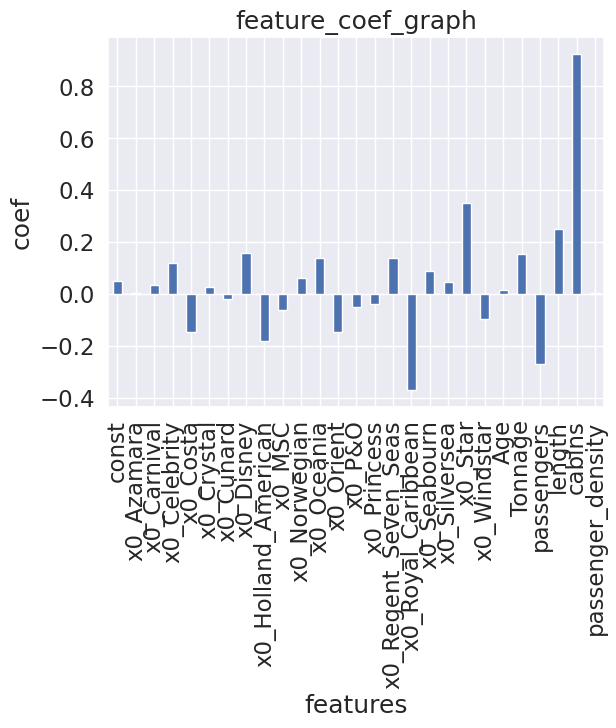

In [545]:
coefs = model.params.tolist()
coefs_se = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coefs_se.plot(kind = "bar")
ax.set_title("feature_coef_graph")
ax.set_xlabel("features")
ax.set_ylabel("coef")
ax.set_xticklabels(x_labels)
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

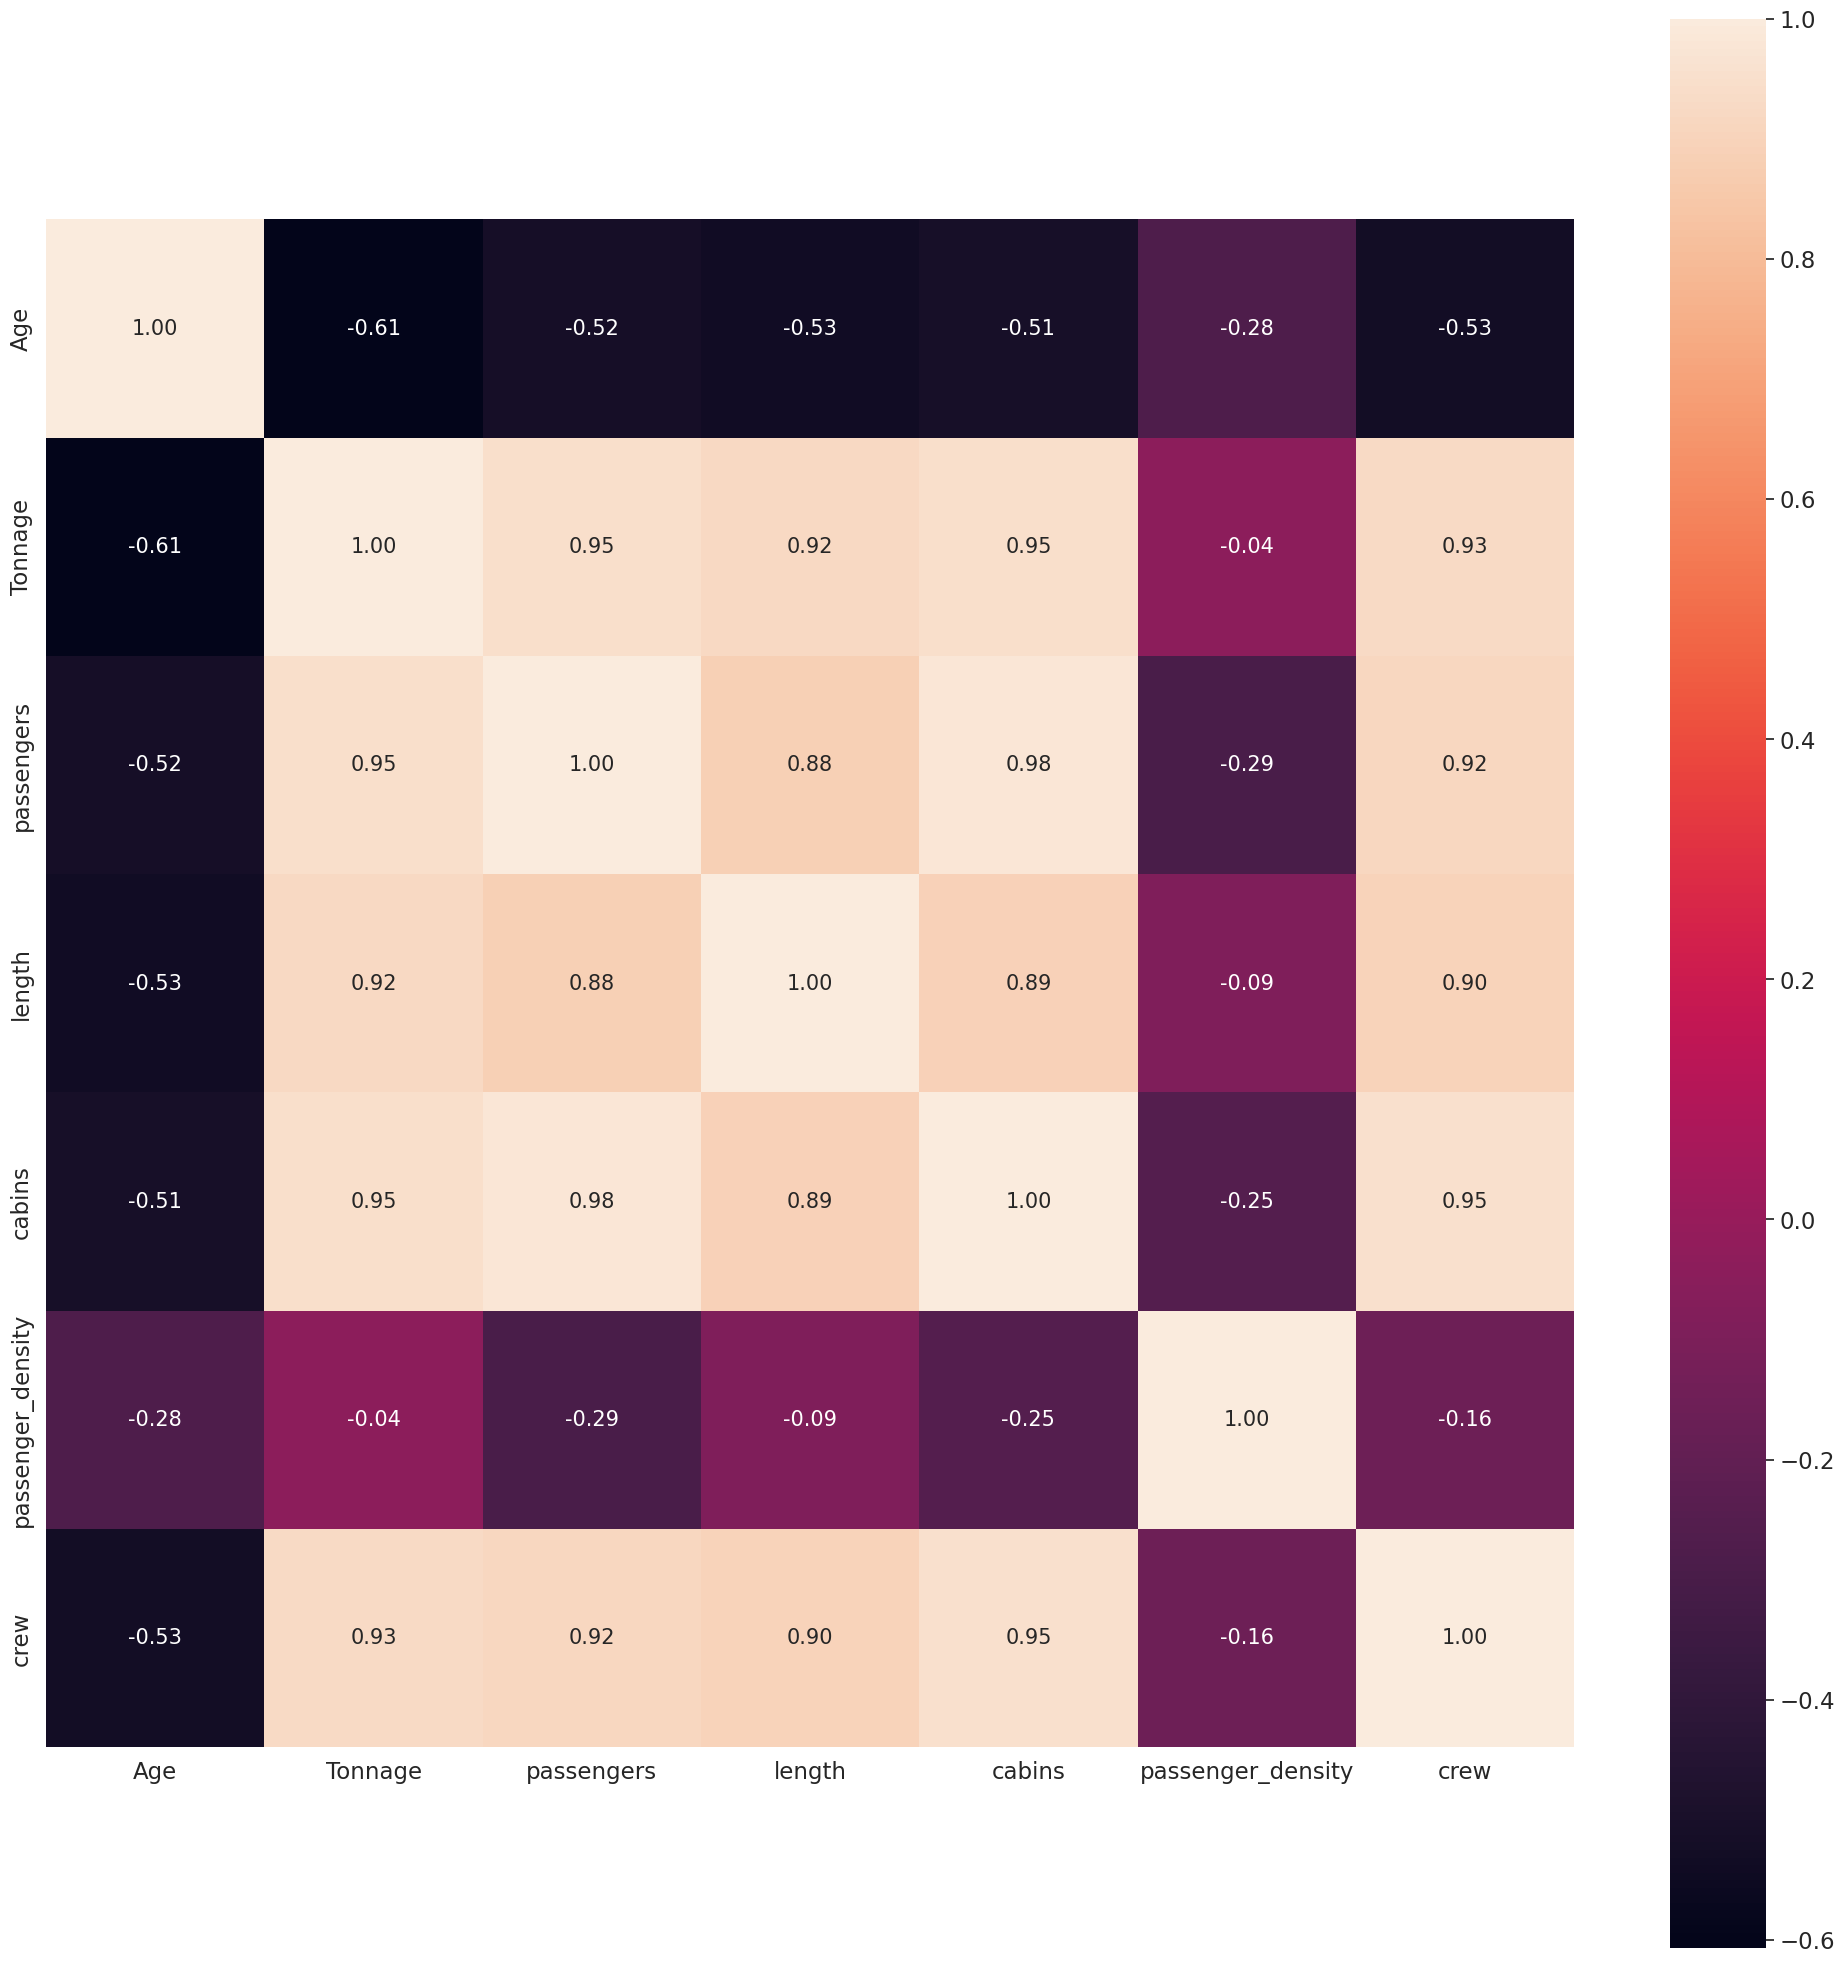

In [546]:
corr = scaled_df[scale_col].corr()
plt.figure(figsize = (20, 20))
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = ".2f",
                 annot_kws = {"size" : 15}, yticklabels = scale_col, xticklabels = scale_col)

plt.tight_layout()
plt.show()

In [547]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [548]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["feature"] = x.columns
vif.round(1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,inf,x0_Azamara
2,inf,x0_Carnival
3,inf,x0_Celebrity
4,inf,x0_Costa
5,inf,x0_Crystal
6,inf,x0_Cunard
7,inf,x0_Disney
8,inf,x0_Holland_American
9,inf,x0_MSC


In [549]:
scaled_df = scaled_df.drop("Age", axis=1)

In [550]:
scaled_df = scaled_df.drop("Tonnage", axis=1)

In [551]:
x = scaled_df.iloc[:, :-1]
y = scaled_df["crew"]

In [552]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=12)

In [553]:
final_lr = LinearRegression()
final_lr.fit(x_train, y_train)

LinearRegression()

In [554]:
final_lr.intercept_

0.03717692377048033

In [555]:
final_lr.score(x_test, y_test)

0.9533031931918905

In [556]:
pred = final_lr.predict(x_test)

In [557]:
mse = mean_squared_error(pred, y_test)

In [558]:
mse

0.04207326924398253